In [474]:
# libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scipy.linalg as la
import chart_studio.plotly as py
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.patheffects as PathEffects
import time

In [475]:
# loading dataset
dataset = pd.read_csv("DataB.csv")

X = dataset.iloc[:,1:785]
Y = dataset.iloc[:,-1]

X_std = StandardScaler().fit_transform(X)

## 2.2 Principal Component Analysis (PCA)

### 2.2.1 Practical Questions

#### 1. In PCA, compute the eigenvectors and eigenvalues. Plot the scree plot and visually discuss which cut-off is good.

(2066, 2066)
[5.17773194e+01 2.88008646e+01 2.67709105e+01 2.39303462e+01
 2.15750394e+01 1.58935251e+01 1.38619413e+01 1.19120888e+01
 1.06614183e+01 9.82358285e+00 9.11333621e+00 8.28795842e+00
 7.47022078e+00 7.18685689e+00 7.01821733e+00 6.72923900e+00
 6.17171361e+00 6.03035494e+00 5.97218819e+00 5.74588510e+00
 5.56641979e+00 5.34085526e+00 5.30999748e+00 5.07244463e+00
 4.90219996e+00 4.74032764e+00 4.46040954e+00 4.43875834e+00
 4.37522974e+00 4.24991493e+00 4.19736144e+00 4.13191195e+00
 4.00668370e+00 3.89959838e+00 3.82103747e+00 3.75801773e+00
 3.70087222e+00 3.57242695e+00 3.53870728e+00 3.47609288e+00
 3.37860197e+00 3.27713810e+00 3.19615121e+00 3.18762080e+00
 3.09982645e+00 3.00645131e+00 2.95668338e+00 2.93613238e+00
 2.84667418e+00 2.80490440e+00 2.77752432e+00 2.73566237e+00
 2.73062118e+00 2.64033670e+00 2.60241921e+00 2.56556417e+00
 2.48286895e+00 2.46546582e+00 2.43864084e+00 2.41046503e+00
 2.38602670e+00 2.34433526e+00 2.31096266e+00 2.25866184e+00
 2.23001715

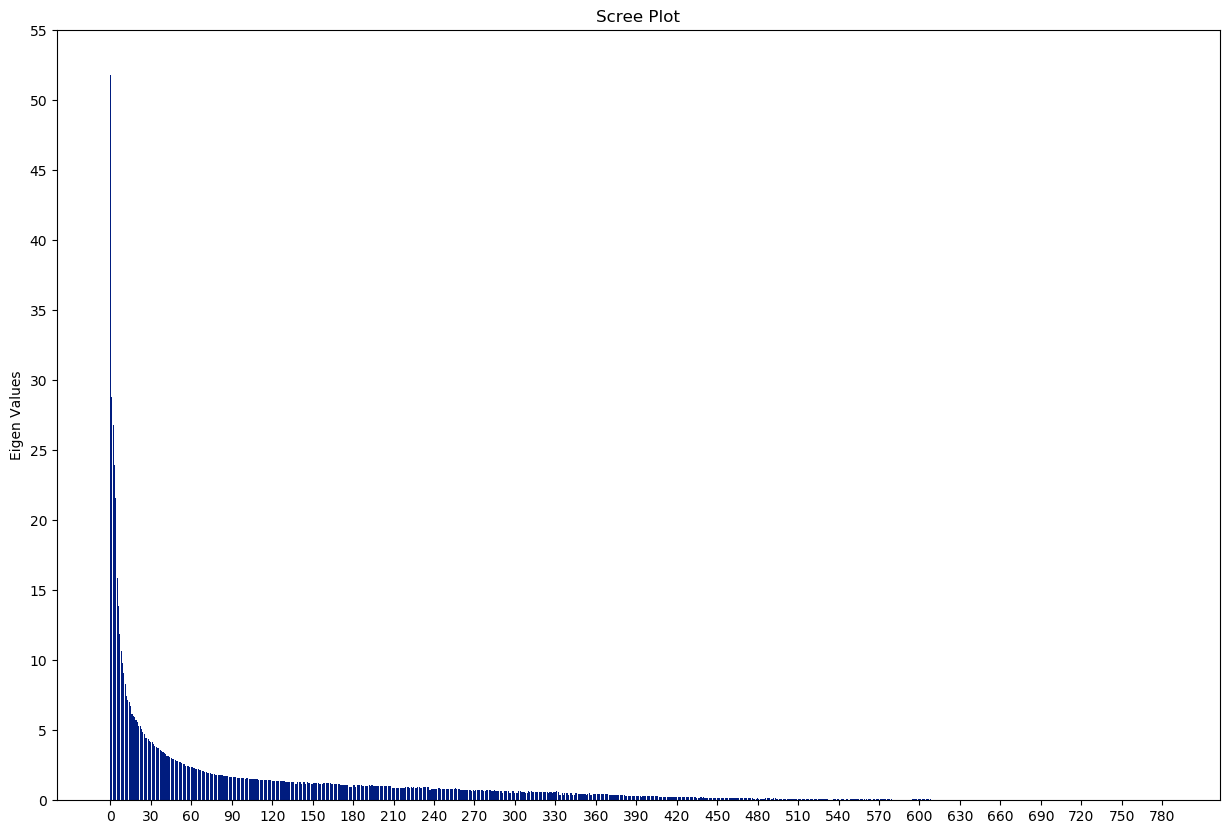

In [480]:
X_std = StandardScaler().fit_transform(X)
#caluclating covariance matrix using numpy cov function
cov_matrix = np.cov(X_std.T)
# print(cov_mat)
print(cov_mat.shape)

#decomposing the covariance matrix into eigen values and eigen vectore using numpy eig method
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
# print(eigen_vectors.shape)
# print(eigen_vectors[:].shape)
# print(eigen_vectors[:20].shape)
# print(eig_vecs)
# print(eig_vals)

#reating an eigen pair using eigen values and eigen vectors
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]

#sorting the eigen pairs using eigen values and making them sorted in descending order
eigen_pairs.sort()
eigen_pairs.reverse()

# print('Eigenvalues in desc order:')
# for i in eig_pairs:
#     print(i[0])

# creating labels for principal components
labels = ['PC %s' %i for i in range(1,785)]
y_pos = np.arange(len(labels))
print( eigen_values)

#plotting the graph
plt.figure(figsize=(15,10))
plt.bar(y_pos, eigen_values, align='center')
# plt.xticks(y_pos, objects)
# as 784 pc names cannot be labeled using steps of 30 to indicate their number.
plt.xticks(np.arange(0, 785, step=30))
plt.yticks(np.arange(0, 60, step=5))
plt.ylabel('Eigen Values')
plt.title('Scree Plot')
plt.show()


###### Descision of cutoff:
A scree plot shows the the eigenvalues in a downward curve, ranging from the largest to the smallest. According to the scree test, the graph's "elbow" where the individual values tend to be levelling off is identified and variables or components to the left of this point can be retained as significant.
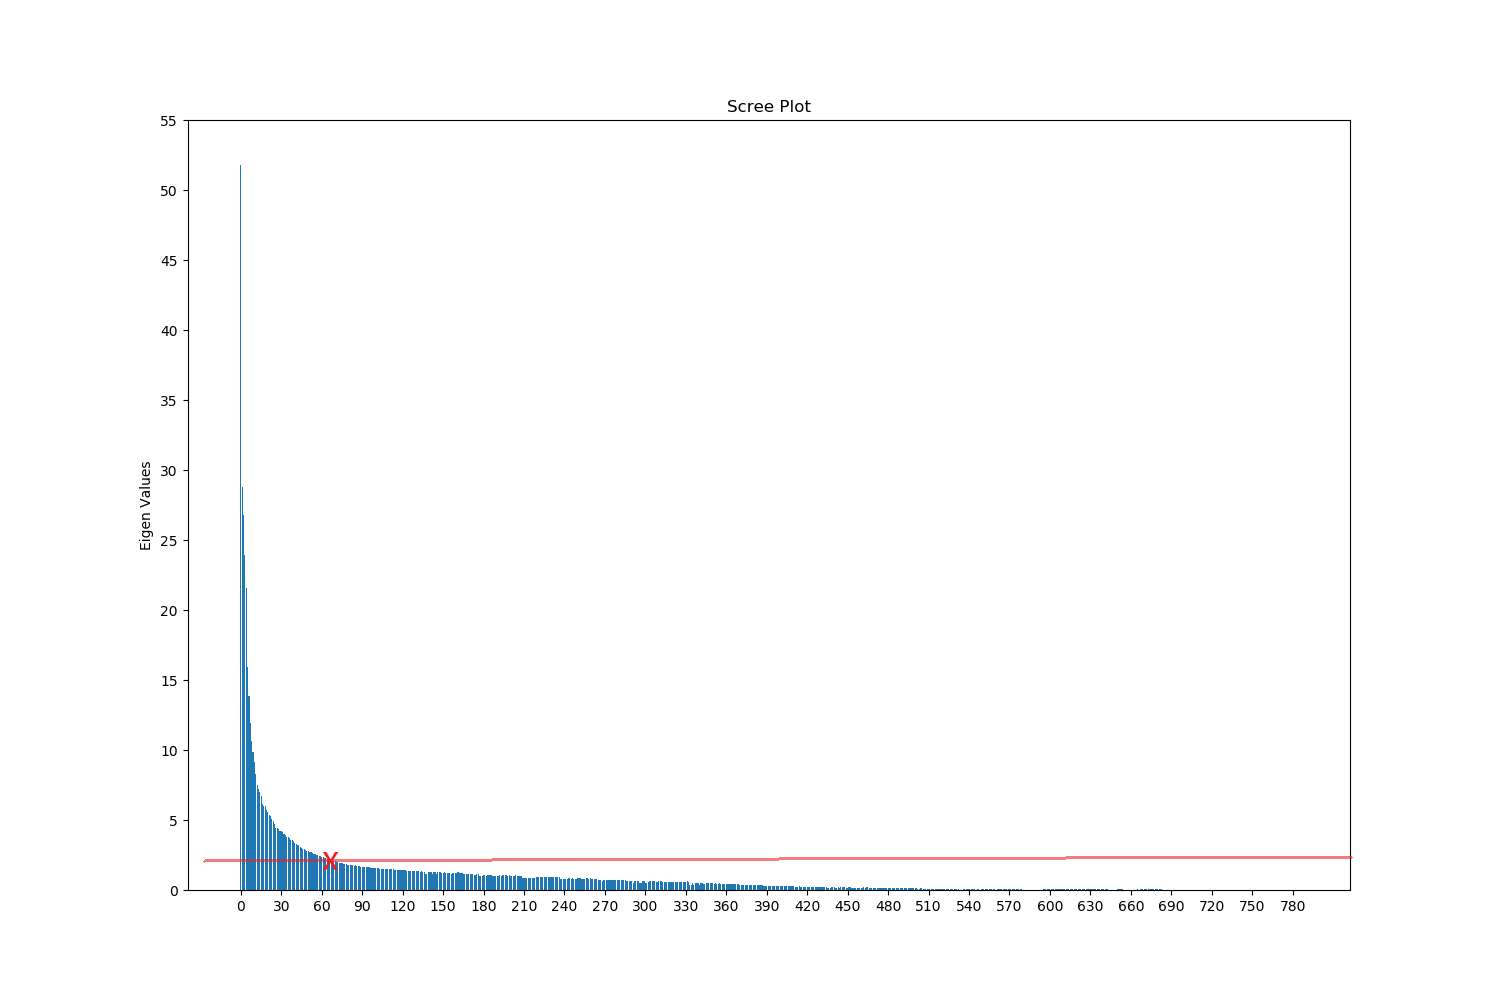
Soure for selection descision : https://en.wikipedia.org/wiki/Scree_plot
######  Total variance explained by slecting 65 principal components as choosen above is : 56.01394993613066

In [472]:
tot = sum(eigen_values)
var_explained = [(i / tot)*100 for i in sorted(eigen_values, reverse=True)]
print("Explained Variance for top 20 eigen vectors {0}".format(sum(var_explained[:65])))

Explained Variance for top 20 eigen vectors 56.01394993613066


#### 2. Using subplot in python matplotlib, plot the scatter plot of the projected data with the top 20 eigenvalues (although PCA does not use labels but use colors and legend to show the class instances). Is there a clear point where you could cut off the dimensions? Compare your analysis with the analysis from previous section.

[0.06601053 0.03671802 0.03413004 0.03050863 0.02750586 0.02026254
 0.01767249 0.01518664 0.01359216 0.01252399 0.01161849 0.01056619
 0.00952355 0.00916037 0.00894705 0.00857481 0.00786448 0.00767597
 0.00760816 0.0073013 ]


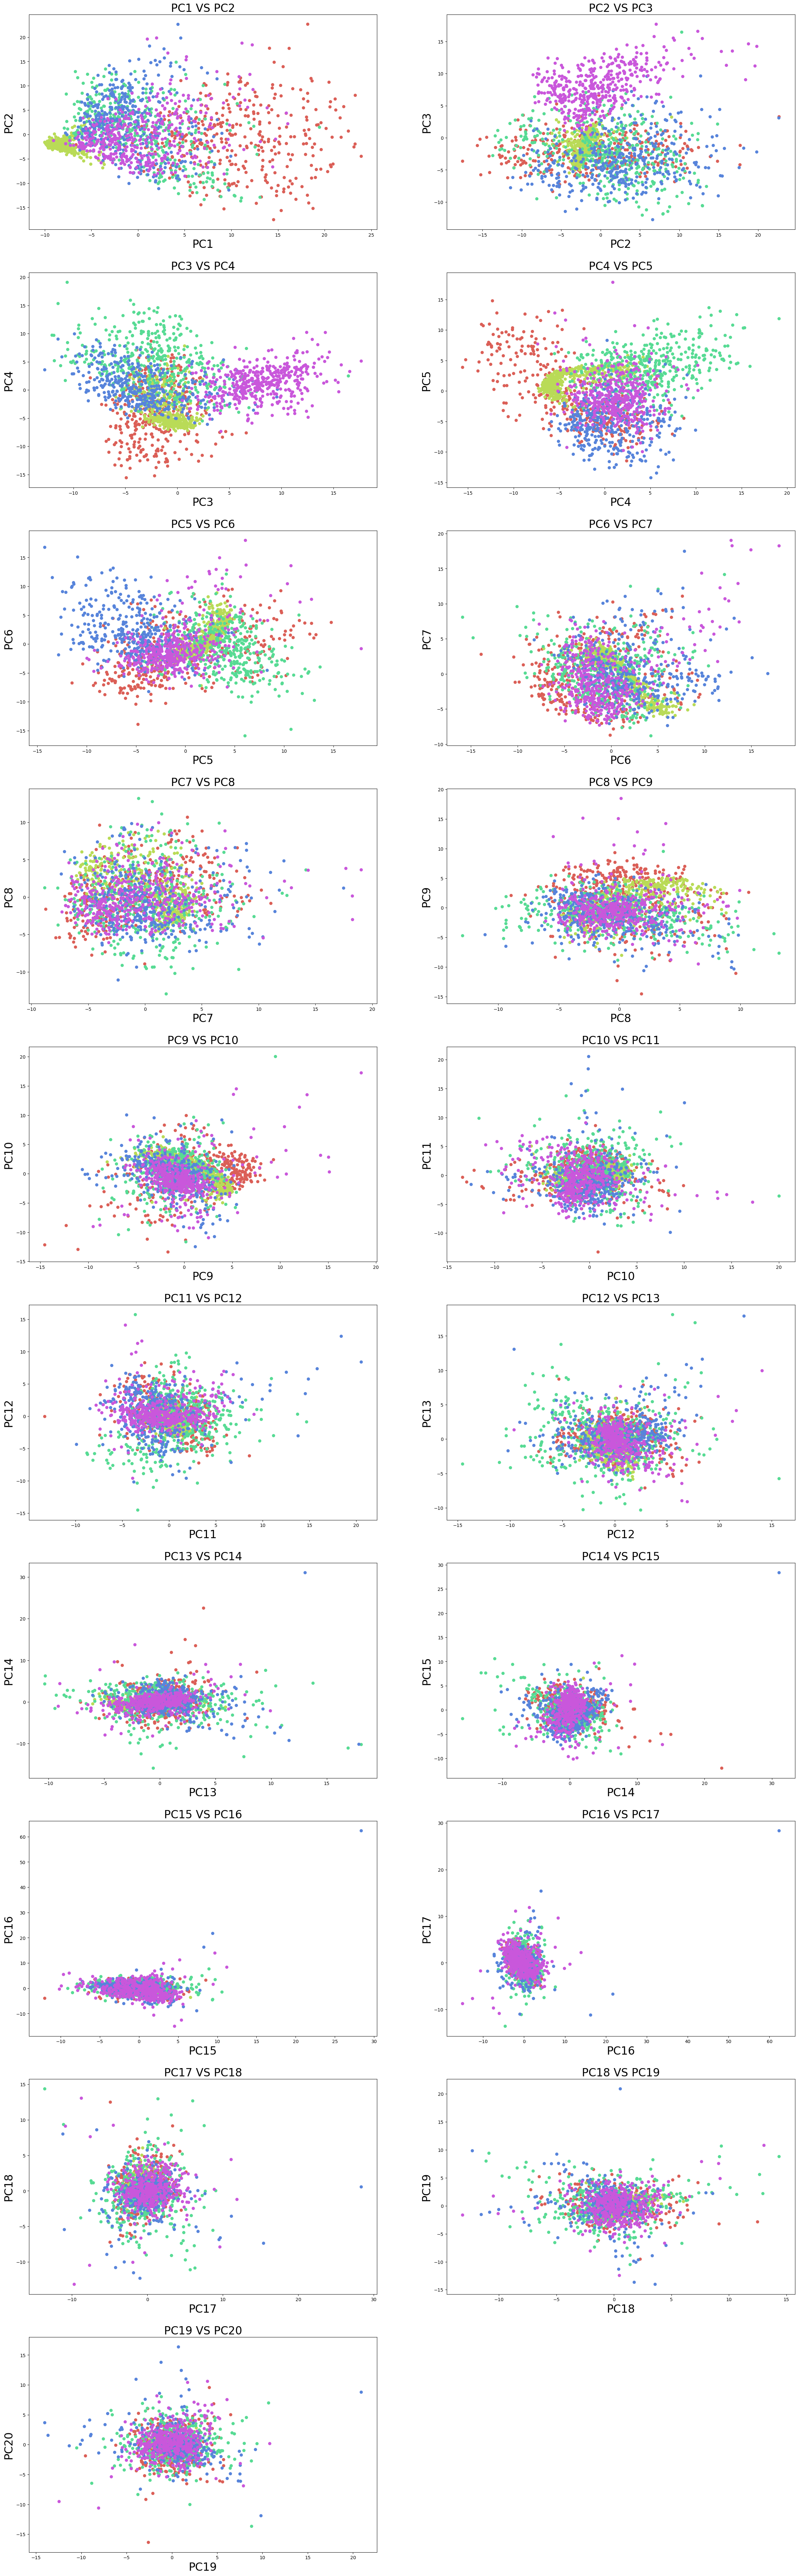

In [456]:
pca_model = PCA(n_components=20).fit(X_std)
pca = pca_model.transform(X_std)
# print(pca_model.explained_variance_ratio_)
# print(pca.shape)
num_classes = len(np.unique(Y))
palette = np.array(sns.color_palette("hls", num_classes))
x=0;
fig = plt.figure(figsize=(30, 100))
for i in range(1,20):
    plt.subplot(10, 2, i)
    if x<19 :
        plt.scatter(pca[:, [x]],pca[:, [x+1]],c=palette[Y.astype(np.int)])
        plt.title("PC"+str(x+1)+" VS "+"PC"+str(x+2),fontsize=24)
        plt.xlabel("PC"+str(x+1),fontsize=24)
        plt.ylabel("PC"+str(x+2),fontsize=24)
        x= x +1;    


In [473]:
tot = sum(eigen_values)
var_explained = [(i / tot)*100 for i in sorted(eigen_values, reverse=True)]
print("Explained Variance for top 20 eigen vectors {0}".format(sum(var_explained[:20])))

pca_model = PCA(.90).fit(X_std)
print("In order to get a expained variance ratio of 90 we need to select {0} PC components".format(len(pca_model.explained_variance_ratio_)))

Explained Variance for top 20 eigen vectors 36.300406688477395
In order to get a expained variance ratio of 90 we need to select 297 PC components


###### Is there a clear point where you could cut off the dimensions? Compare your analysis with the analysis from previous section.

 - A clear cut off cannot be indetified using the scatter plots.
 - We can see that the ecplained variance ratio when top 20 eigen values are choosen is 36.300406688477395,which is not good enough for good classification of the data.
 - As shown above selection of 65 top eigen values we ten to achieve a explained variance of 56.01394993613066.
 - In order to achive a explained variance ration of 90 we need to choose about 297 PC  

#### 3. Plot two 2-dimensional representations of the data points based on the first vs second principal components and 5th vs 6th displaying the data points of each class with a different color (you will need to project the data). Explain the results versus the known classes and compare between the two plots.

<Figure size 3000x1000 with 0 Axes>

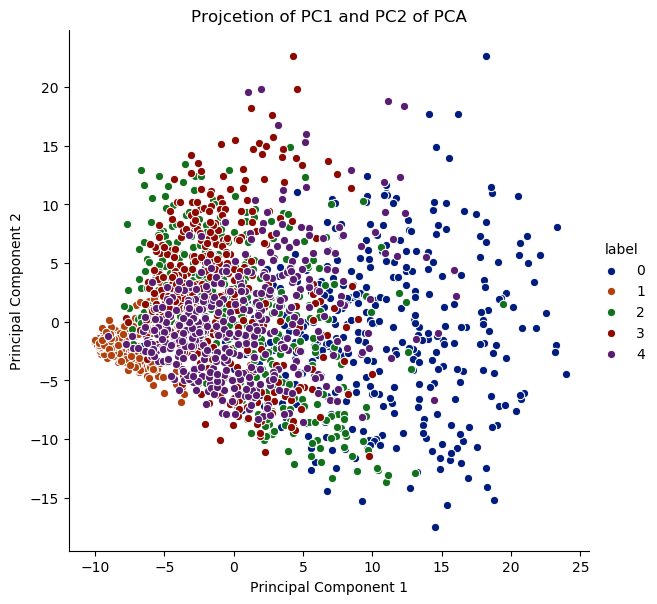

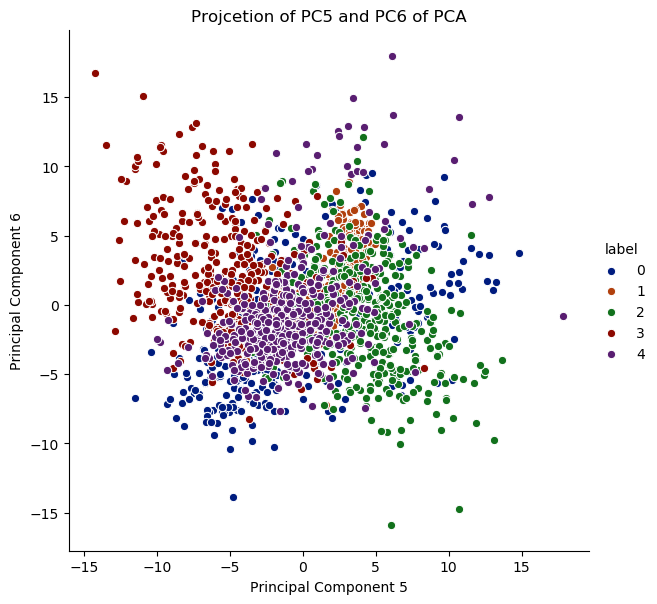

In [462]:
x=0
j=1
# X_train_lda = pd.DataFrame(data = X_train_lda, columns = ['Component 1', 'Component 2'])
fig = plt.figure(figsize=(30, 10))
for i in range(1,20):
    pca_data = pd.DataFrame(data = pca[:,[x,x+1]], columns = ['Principal Component '+str(x+1), 'Principal Component '+str(x+2)])
    pca_data['label'] = Y
    if x==0 or x==4 :
        sns.pairplot(pca_data,hue='label',x_vars=['Principal Component '+str(x+1)],y_vars=['Principal Component '+str(x+2)],height=6).set(title ="Projcetion of PC"+str(x+1)+" and PC"+str(x+2)+" of PCA")
    x= x +1;    

##### Understanding Plot PC1 VS PC2

 - From the plot we can observe that class1 has been clustered together to the left center of the plot.
 - Class0 is highly dispersed across the right most part the graph ,along with the noise datapoints of other classes.
 - Class2,Class3,Class4 are sparesly clustered together with no specific structures ,one lying under the other along with the noise datapoints spreading all over the graph.
 
##### Understanding Plot PC5 VS PC6

 - From this plot we can notice that Class1 is densely clustered but has been overlapped by other class data points.
 - Class0 is very sparsed accros the graph with no specific cluster.
 
##### COmparision of  Plots (PC1 vs PC2) as "Plot1" and  (PC5 vs PC6) as "Plot2"

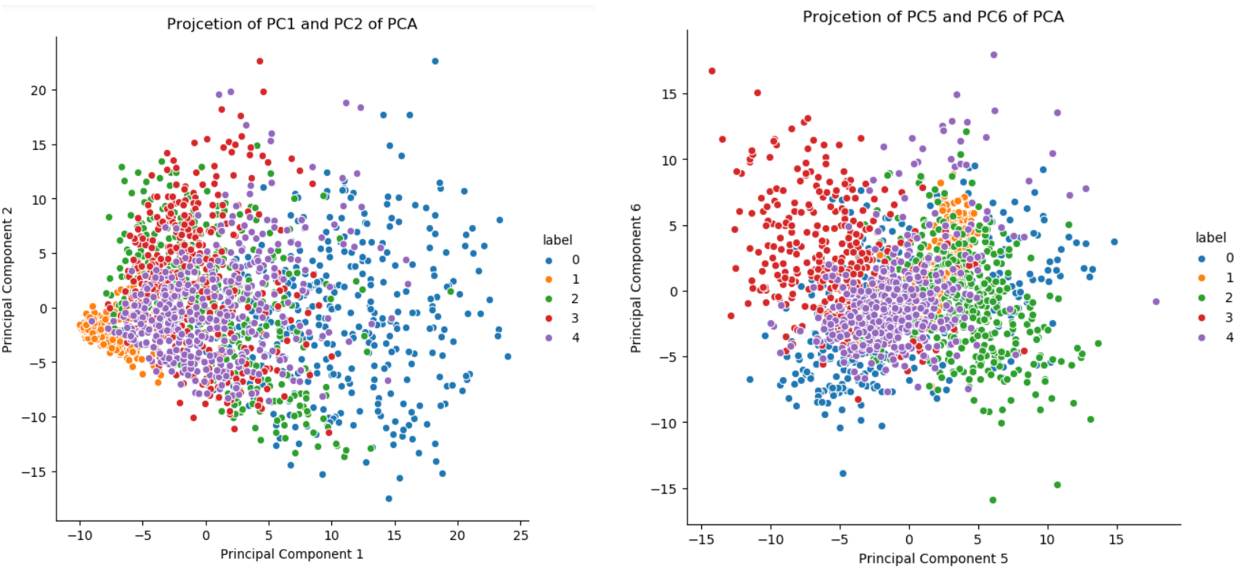
 
 - From the above comparison graph we can see that in Plot1 PCA does well to cluster Class1 from other clusters than that of Plot2 where the cluster of Class1 is overlapped by all other clusters.
 - In Plot2 Class2 cluster is nostly concentrated to the right lower corner of the graph which is better than the Plot1 Class1 cluster ,which is spread all over the graph.
 - For Class3 both the plots tend to perform the same.
 - Class0 cluster of Plot1 is very sparesly cluster, where it is bit densily clustered in Plot but which is overlapped by other clusters.
 - Cluster of Class4 in Plot 2 is bit densily clustered but is overlapped by almost all the clusters of other classes ,where as the overlapping is less in Plot1.


#### 4. Implement (1) PCA and (2) dual PCA with singular value decomposition.Save the time of computations and compare the times. Analyze your comparison.

##### PCA with SVD left matrix :

In [463]:
# X_std = StandardScaler().fit_transform(X)
#caluclating covariance matrix using numpy cov function
X_new = X

start_time1= time.time()
meanPoint =X_new.mean(axis = 0)
# print(meanPoint)

# subtract mean point
X_new -= meanPoint
# n, m = X_std.shape
# assert np.allclose(X_std.mean(axis=0), np.zeros(m))
    
#Using left SVD matrix which is X.T * X in our case
# cov_matrix = np.cov(X_new.T)
cov_matrix= np.dot(X_new.T, X_new)
# cov_matrix = np.dot(X_std.T,X_std) / (n-1)
# print(cov_mat)
# print(cov_mat.shape)

#decomposing the covariance matrix into eigen values and eigen vectore using numpy eig method
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

pca_svd = np.dot(X_new,eigen_vectors)

print("time taken for PCA {0} sec".format(time.time() - start_time1))
print(pca_svd.shape)



time taken for PCA 0.4268534183502197 sec
(2066, 784)


##### dual PCA with SVD right matrix

In [464]:
start_time1= time.time()
meanPoint =X_new.mean(axis = 0)
X_new -= meanPoint
cov_mat= np.dot(X_new, X_new.T)
eigen_values, V = np.linalg.eig(cov_mat)
V_sqare_root = np.sqrt(eigen_values)
sigma = np.zeros((784,2066))
np.fill_diagonal(sigma,V_sqare_root)
dual_pca = V.T.dot(sigma.T)
print("time taken for dual PCA {0} sec".format(time.time() - start_time1))
print(dual_pca.shape)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\index_tricks.py:861: ComplexWarning:

Casting complex values to real discards the imaginary part



time taken for dual PCA 4.789140939712524 sec
(2066, 784)


##### Save the time of computations and compare the times. Analyze your comparison.

 - The time taken by PCA is 0.596637487411499 sec
 - The time taken by dual PCA is 5.307797193527222 sec
 
###### The time taken by dual PCA is almost times that of PCA.

Analysis:
 
 - For PCA with SVD the complexity of the algotithm is mostly due to the decomposition of eigenvalues and vectors which can be roughly O(d^3)(big O of d cube).
 - For dual LDA with SVD ,along with eigen decomposition generating sigma matrix has a complexity of O(dn^2) (big O of d*(n sqaure)).
 - So for this data set number of samples n is thrice the number of dimensions, the time taken by dual PCA tends to be more than that of PCA
 - Hence dual PCA can be used when the number of features are very greater than samples.


### 2.2.2 Theoretical Question

#### Prove that PCA is the best linear method for reconstruction (with orthonormal bases). Hint: write down the optimization problem and solve it.

![New%20Doc%202020-03-08%2019.18.38_1.jpg](attachment:New%20Doc%202020-03-08%2019.18.38_1.jpg)
![New%20Doc%202020-03-08%2019.18.38_2.jpg](attachment:New%20Doc%202020-03-08%2019.18.38_2.jpg)
![New%20Doc%202020-03-08%2019.18.38_3.jpg](attachment:New%20Doc%202020-03-08%2019.18.38_3.jpg)
![New%20Doc%202020-03-08%2019.18.38_4.jpg](attachment:New%20Doc%202020-03-08%2019.18.38_4.jpg)
![New%20Doc%202020-03-08%2019.18.38_5.jpg](attachment:New%20Doc%202020-03-08%2019.18.38_5.jpg)
![New%20Doc%202020-03-08%2019.18.38_6.jpg](attachment:New%20Doc%202020-03-08%2019.18.38_6.jpg)

## 2.3 Fisher Discriminant Analysis (FDA)

### 2.3.1 Practical Questions

####  1. As the class labels are already known, you can use the FDA or LDA to reduce the dimensionality. Using any implementation of FDA or LDA you wish, and subplot in python matplotlib, plot the scatter plot of the projected data with the top 20 eigenvalues (use colors and legends for classes).

In [465]:
def scatter_plot(x, colors,method,ax,xlab,ylab):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    sc = ax.scatter(x[:,0], x[:,1], c=palette[colors.astype(np.int)])
    ax.set_title(method,fontsize=24)
    plt.xlabel(xlab,fontsize=24)
    plt.ylabel(ylab,fontsize=24)
    # add the labels for each digit corresponding to the label

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])

(2066, 4)


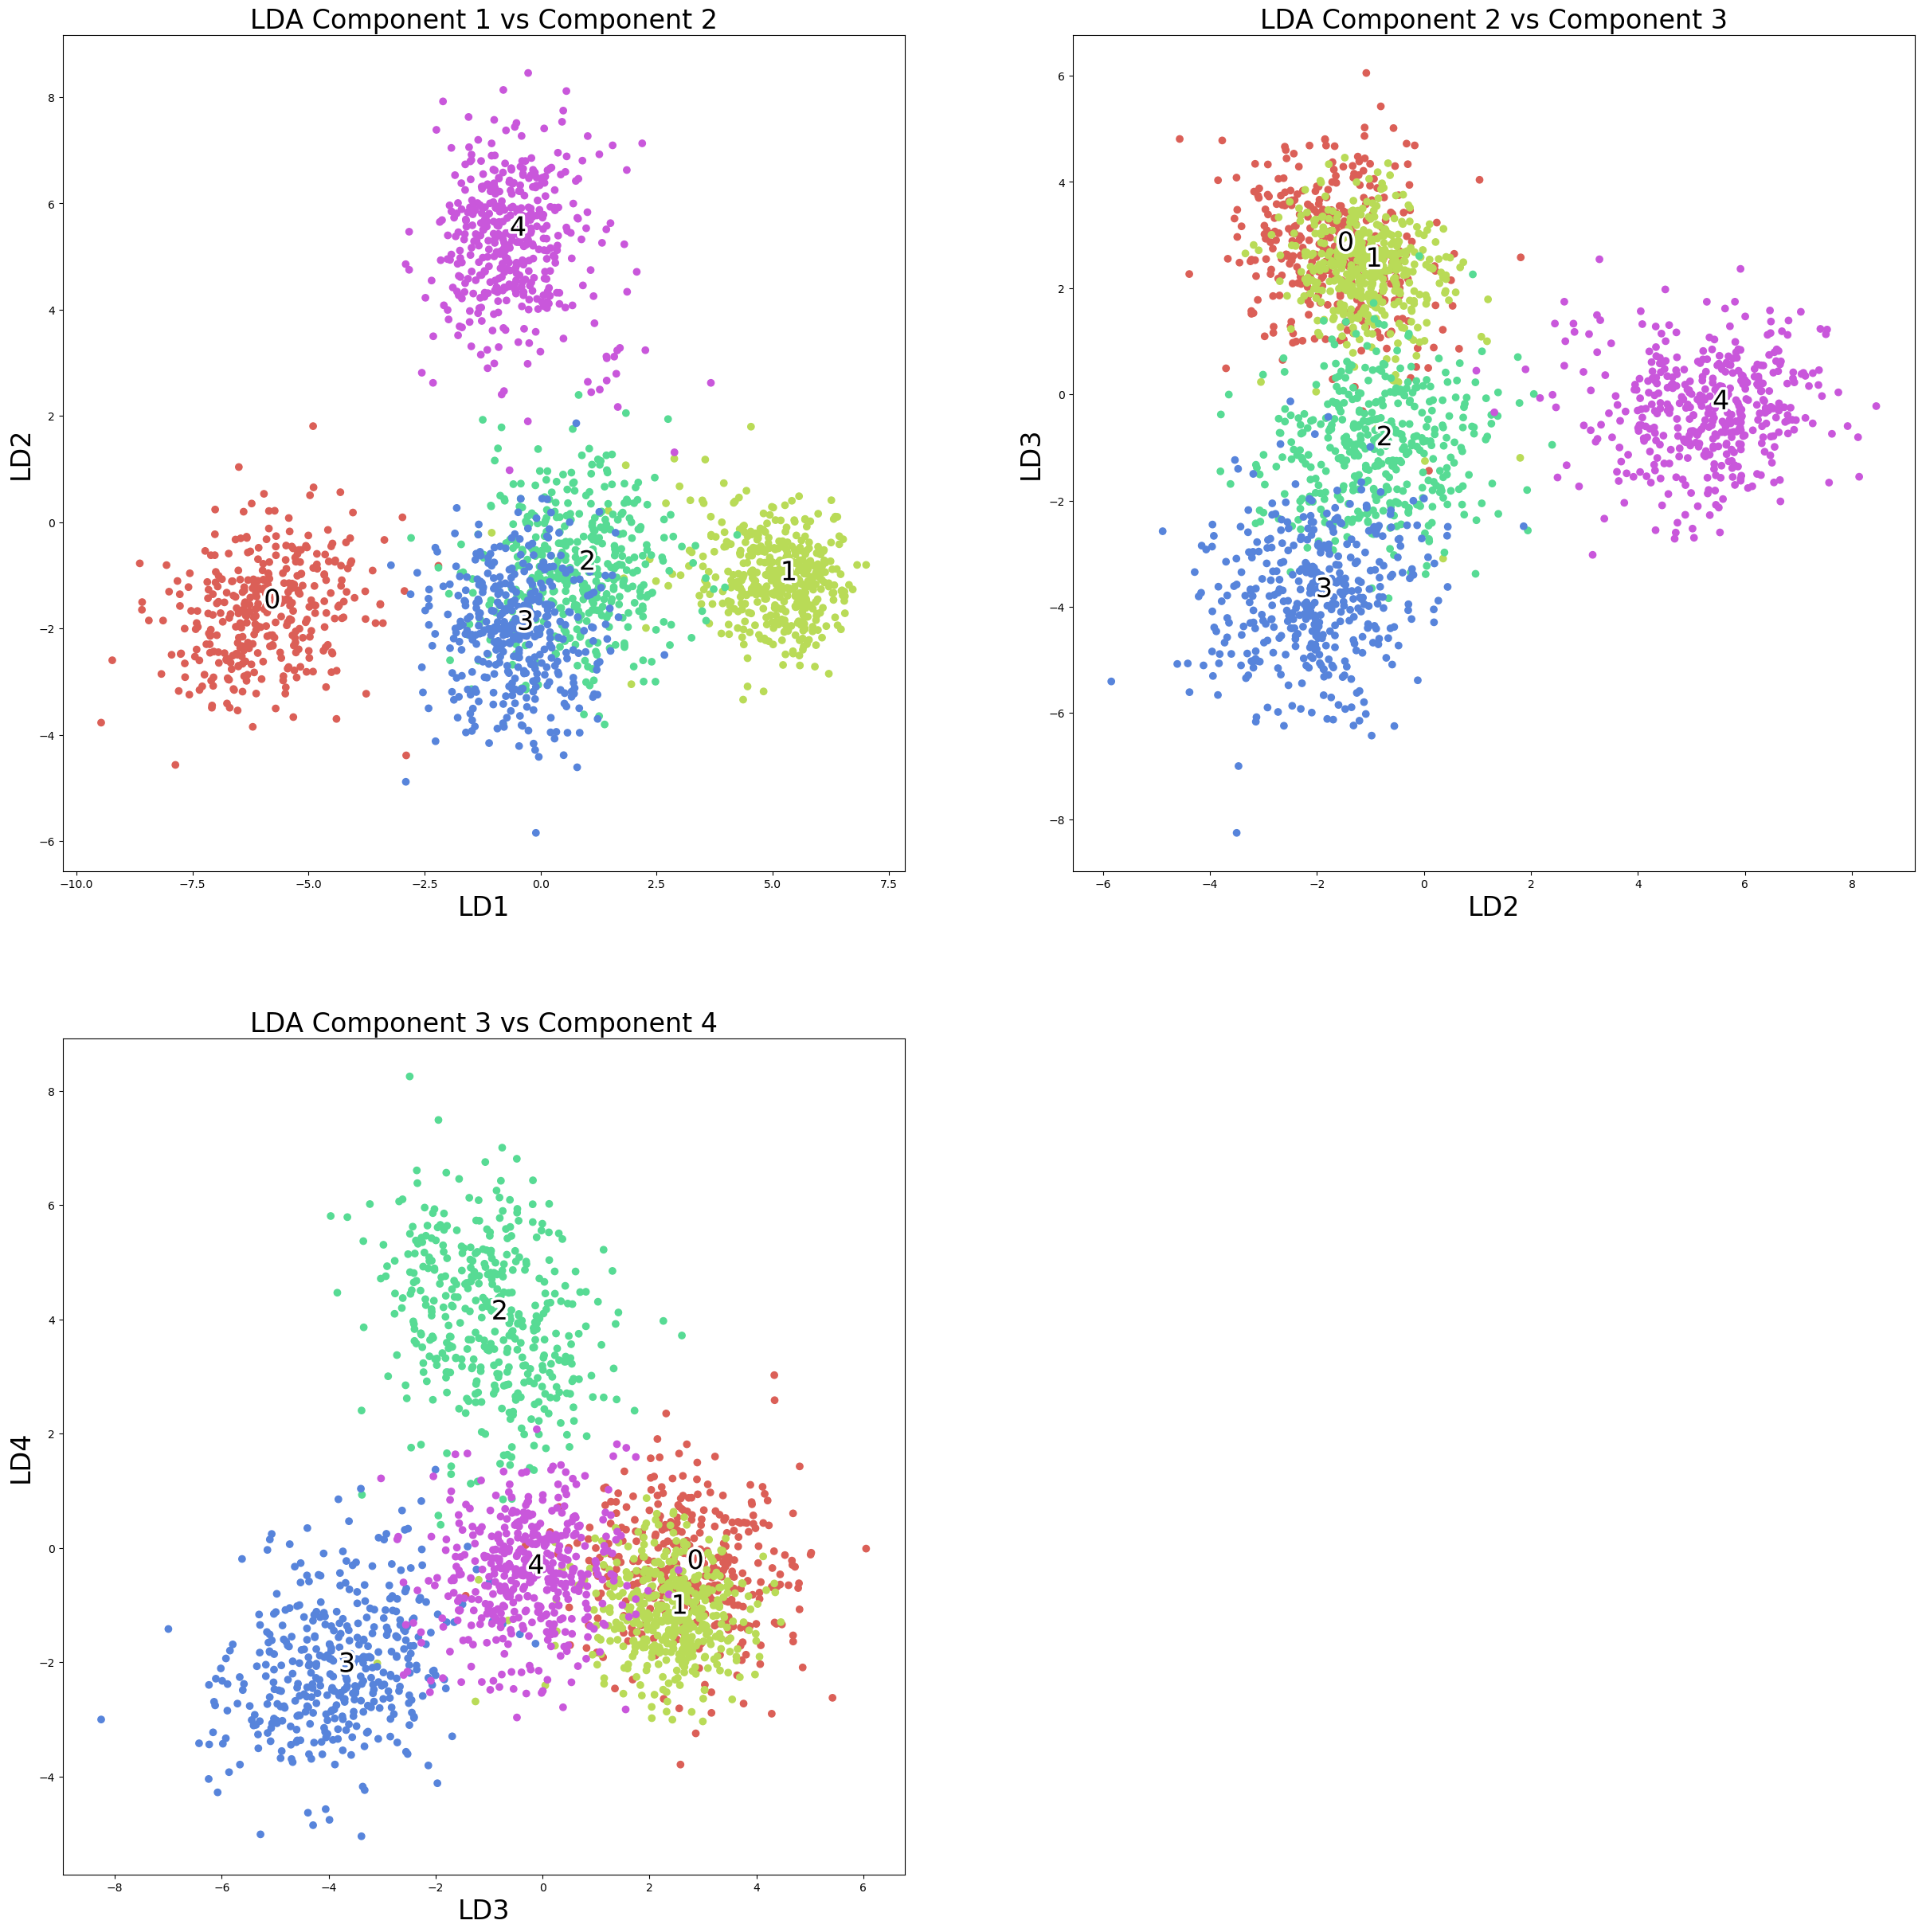

In [466]:
X = dataset.iloc[:,1:785]
Y = dataset.iloc[:,-1]

scaler = StandardScaler().fit(X)
X_train_norm = scaler.transform(X)

#fitting LinearDiscriminantAnalysis model only for train set
lda = LinearDiscriminantAnalysis(n_components=None)
lda.fit(X_train_norm,Y)

#transforming both train and test data using fitted model
X_train_lda = lda.transform(X_train_norm)

print(X_train_lda.shape)



# f = plt.figure(figsize=(8, 8))
fig = plt.figure(figsize=(30, 30))
for i in range(0,3):
    ax = plt.subplot(2,2,i+1)
    scatter_plot(X_train_lda[:,[i,i+1]],Y,"LDA Component "+str(i+1)+" vs Component "+str(i+2),ax,"LD"+str(i+1),"LD"+str(i+2))
# X_train_lda = pd.DataFrame(data = X_train_lda, columns = ['Component 1', 'Component 2','Component 3', 'Component 4'])
# X_train_lda['label']=Y
# sns.set_palette("dark")
# sns.pairplot(X_train_lda,hue='label',height=7).set(title ="Projcetion of first two components of LDA for label 'quality'")

##### Explain the results obtained in terms of the known classes. Which LDA directions separate which classes better (which LDA directions are responsible for separating which classes)?

Let Comp1 vs Comp2 = Plot1

Let Comp2 vs Comp3 = Plot2

Let Comp3 vs Comp4 = Plot3

 - From Plot1 we can observe that LD1 direction can separates classes '0' and '1' quite well ,but fails to add any valuble information about classes '2','3' and '4'.
 - From Plot1 and Plot2 we can observe that LD2 separates class '4' very well ,but does very bad for the remaining classes.
 - From Plot2 and Plot3 we can observe that LD3 separates class '3' but with some noise datapoints for other classes.
 - From Plot3 we can notice that class '2' can be separated using LD4.
 
Directions and thier responsibilty to separate classes:

 - Direction 1(LD1) -> class '0' and class '1'
 - Direction 2(LD2) -> class '4'
 - Direction 3(LD3) -> class '3'
 - Direction 4(LD4) -> class '2'

#### 2. Compare the results of the LDA with the results obtained by using PCA.

 - We can observe that from the graph clustering can be visualised well with the plots of LDA rather than that of PCA
 - Both LDA and PCA are linear transformation techniques: LDA is a supervised whereas PCA is unsupervised – PCA ignores class labels.So LDA identifies the clusters better by using the class labels.
 -  PCA is a technique that finds the directions of maximal variance,where as in contrast,LDA attempts to find a feature subspace that maximizes class separability.Hence the class separability in LDA plots has good boundaries.

### 2.3.2 Theoretical Question

#### Compare this with the optimization in PCA. Explain and analyze your comparison. After this analysis, compare your  theoretical comparison (this question)  and the practical comparison (question 2 in practical questions).

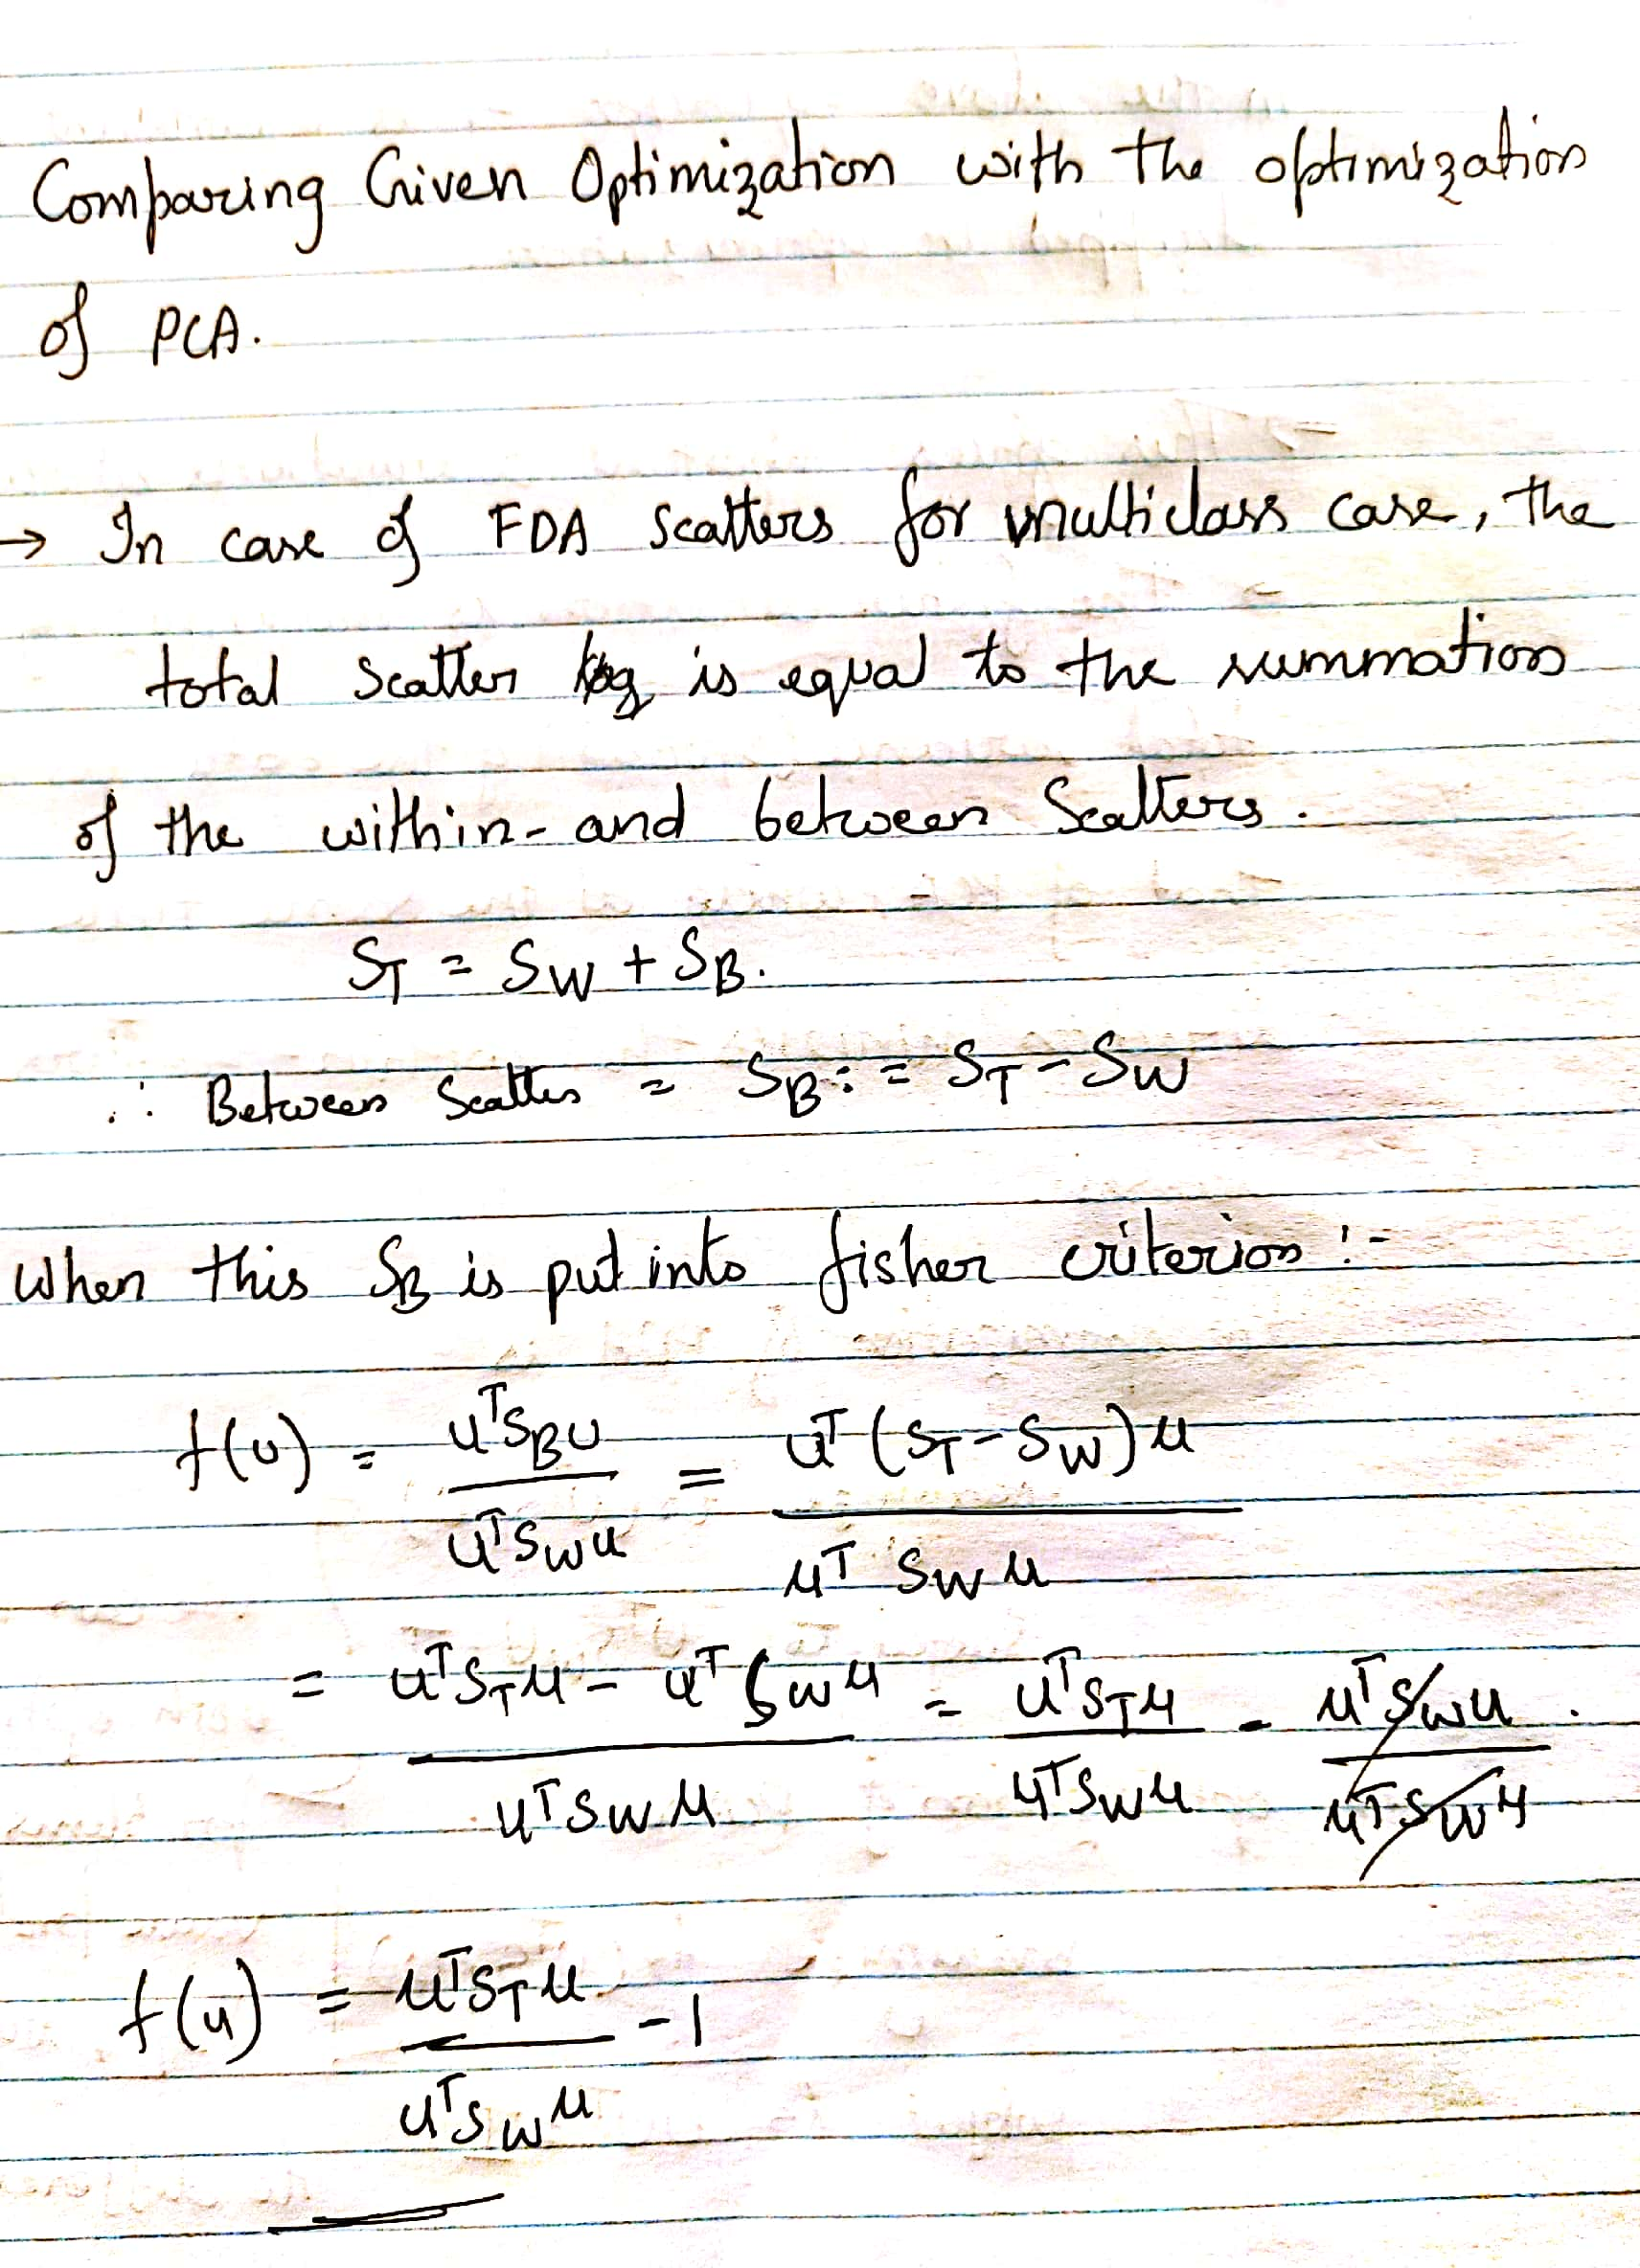
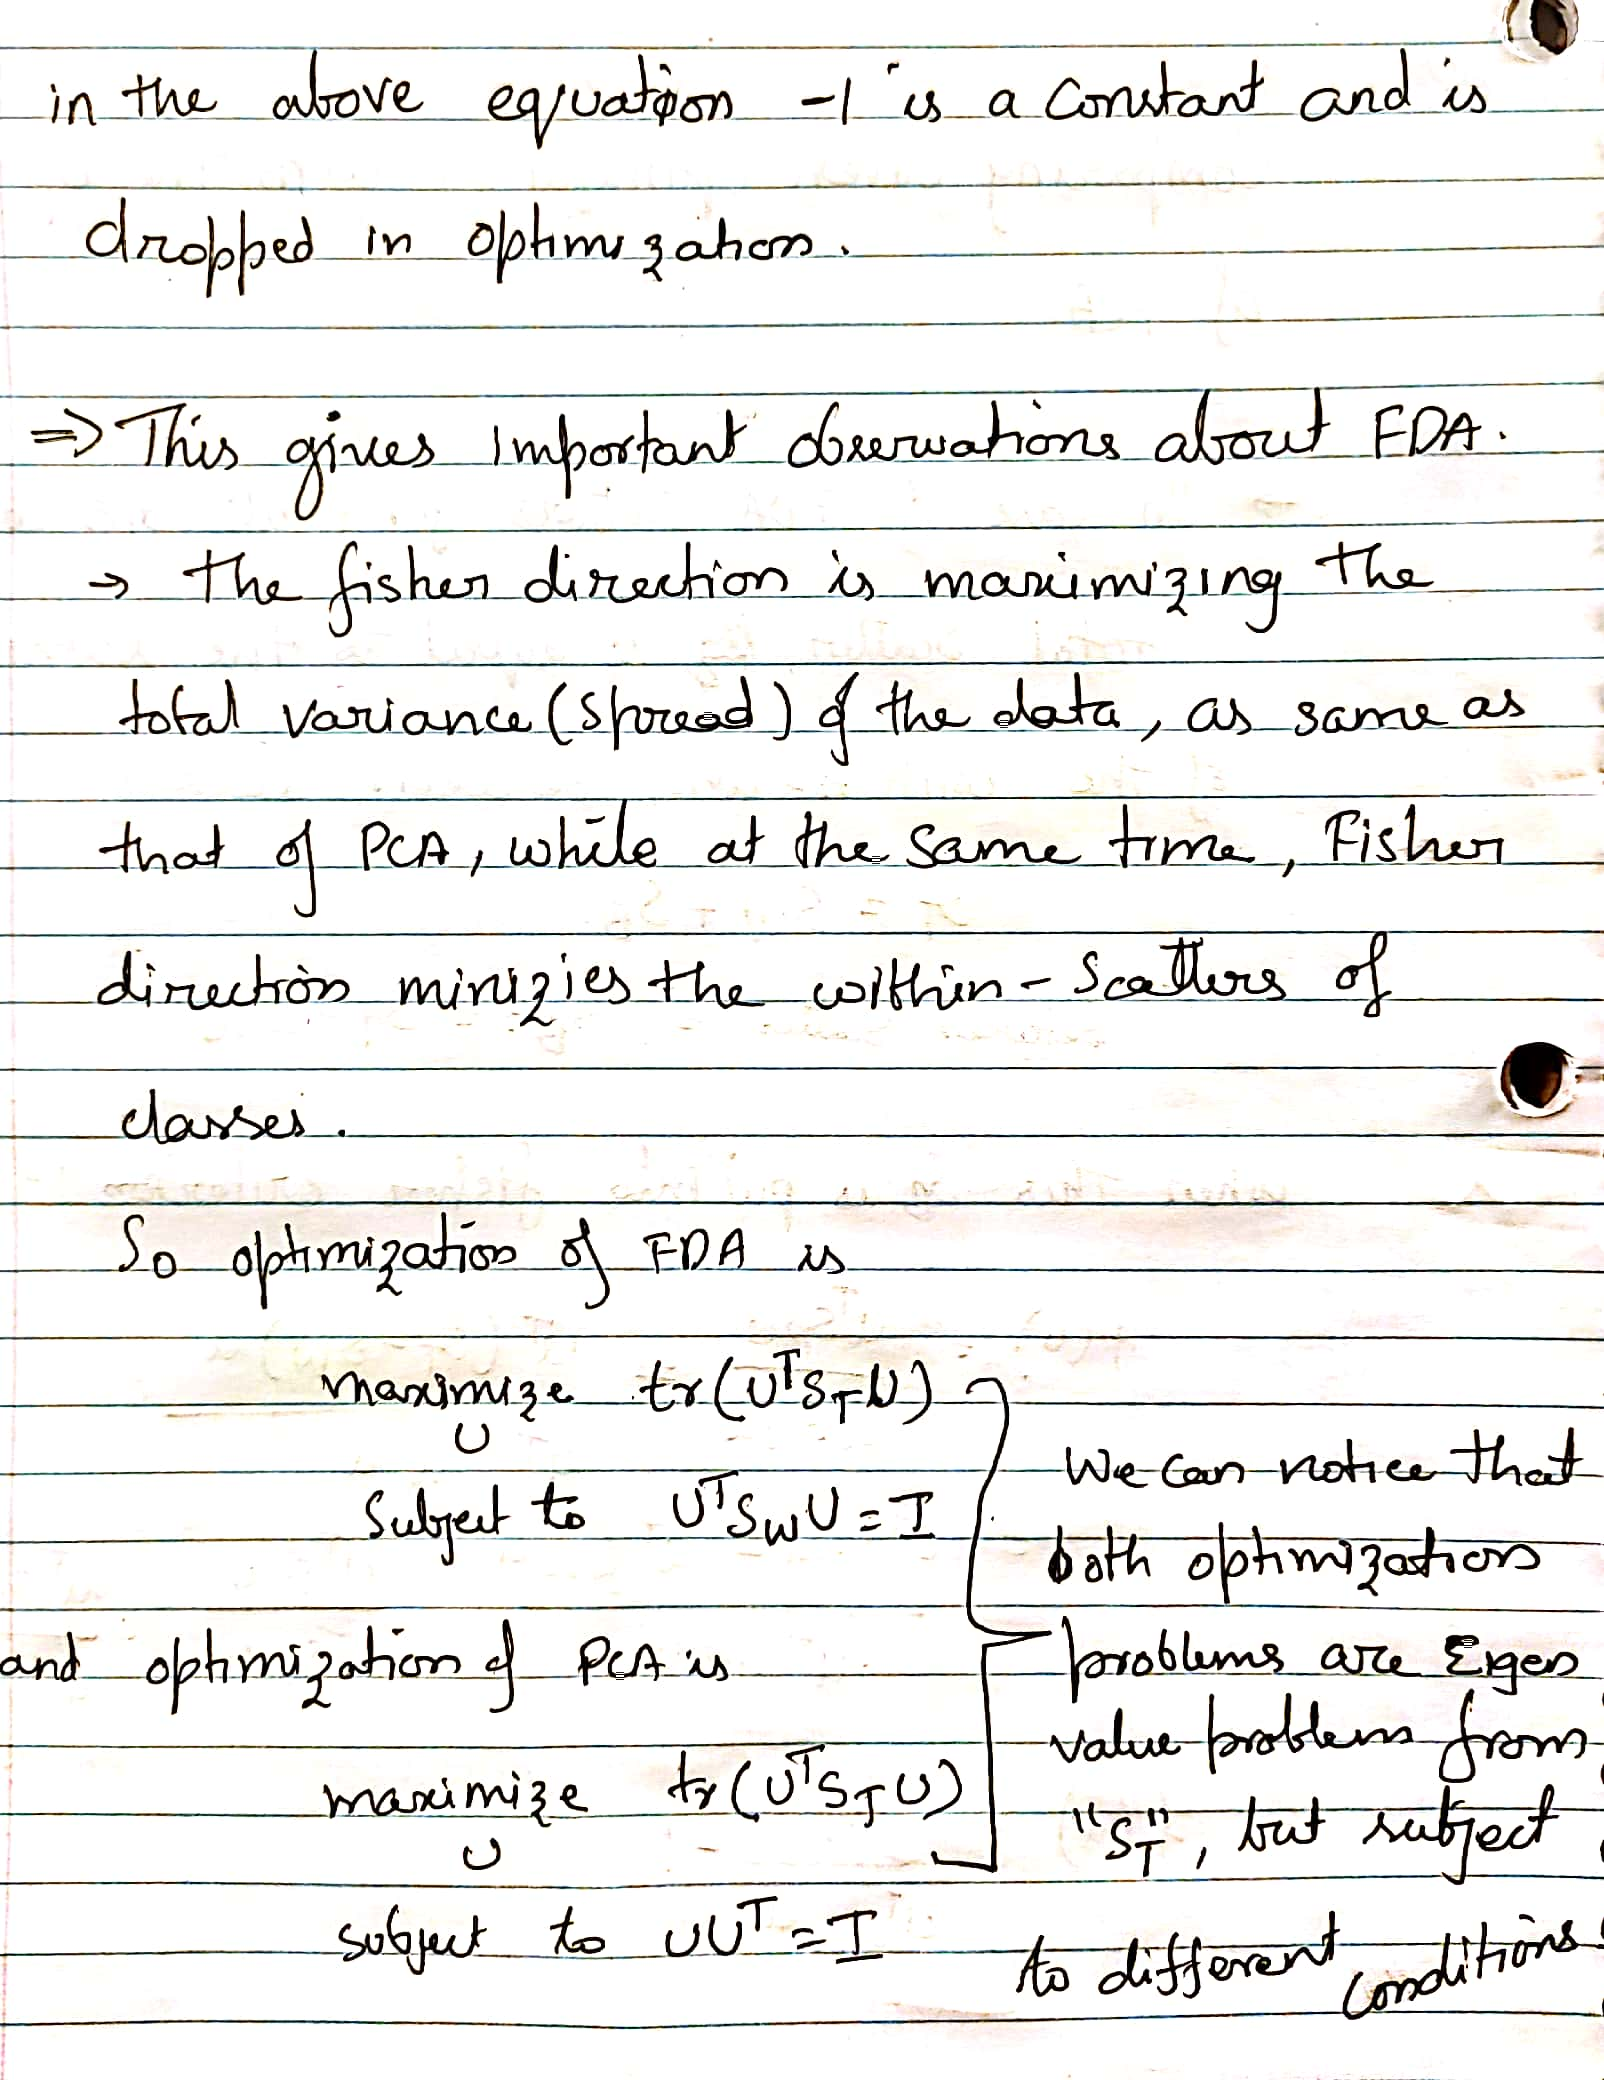

 - From the above analysis we can note that,Fisher directions are maximizing the total variance(spread) of the data just like the PCA.So we can observe that both PCA and LDA has almmost similar area of scatter.
 - At the same time Fisher directions tend to minimize the sactters within the classes.So we can notice that the clusters of FDA are more denser than that of PCA along with good separation between clusters.As this tries to minimize teh within scatters , the boundaries between clusters are more visible.
 - Each Fisher directions tries to minimise the scatter of some class along its direction.Hence we can observe from the scatter plots FDA, that each direction clusters one class along its direction.

References : 
 
 - Building PCA model : https://www.jeremyjordan.me/principal-components-analysis/ 
 - PCA Scree Plot descision : https://en.wikipedia.org/wiki/Scree_plot 
 - LDA Analysis : https://sebastianraschka.com/Articles/2014_python_lda.html
 - Subplots : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html
 - Scatter Plot : https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html